In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# read data
df = pd.read_csv('../数据/future_price.csv')
df['date'] = pd.to_datetime(df['date'])

all_categories = df['name'].unique()
print('All categories: {}'.format(all_categories))

All categories: ['螺纹钢' '线材' '沪铜' '沪铝' '橡胶' '燃油' '沪锌' '黄金' '白银' '沥青' '热轧卷板' '沪镍' '沪铅' '原油'
 '沪锡' '纸浆' '豆一' '豆二' '玉米' '玉米淀粉' '乙二醇' '纤维板' '铁矿石' '焦炭' '鸡蛋' '焦煤' '塑料'
 '豆粕' '棕榈' 'PP' 'PVC' '豆油' '鲜苹果' '棉花' '红枣' '棉纱' '玻璃' '粳稻' '晚籼稻' '郑醇' '菜油'
 '早籼稻' '菜粕' '菜籽' '硅铁' '锰硅' '白糖' 'PTA' '强麦' '动力煤']


In [14]:
def get_price_series(name, n_points=90, field='close'):
    s = df[df['name']==name]
    s = s.set_index('date').sort_index()[field]
    return s.tail(n_points)

get_price_series('螺纹钢', n_points=90)

date
2022-02-14    4817.0
2022-02-15    4728.0
2022-02-16    4832.0
2022-02-17    4686.0
2022-02-18    4779.0
               ...  
2022-06-20    4149.0
2022-06-21    4224.0
2022-06-22    4128.0
2022-06-23    4235.0
2022-06-24    4189.0
Name: close, Length: 90, dtype: float64

# Plotting

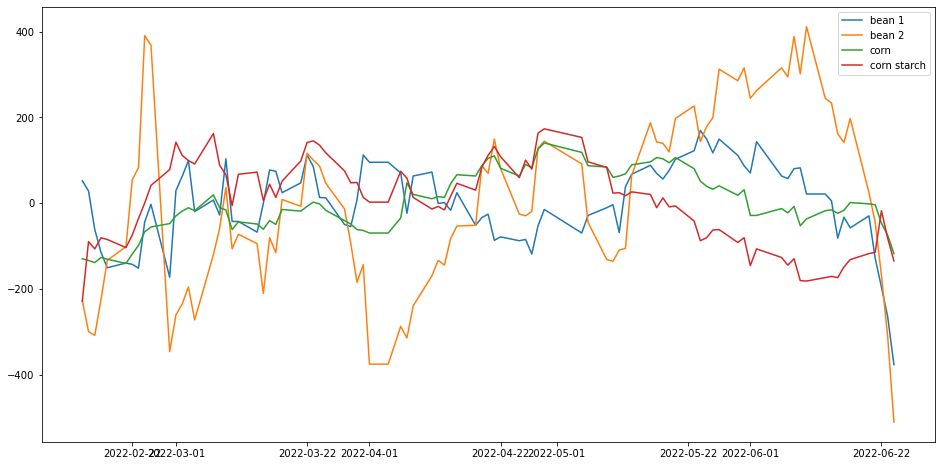

In [22]:
_ = plt.subplots(figsize=(16, 8))

plot_categories = [('豆一', 'bean 1'), 
                ('豆二', 'bean 2'),
                ('玉米', 'corn'),
                ('玉米淀粉', 'corn starch'),
                ]
length = 90

for c, alias in plot_categories:
    s = get_price_series(c, length)
    s -= s.mean()
    plt.plot(s, label=alias)
plt.legend()

## Correlation Matrix

In [24]:
start_date = '20220101'

df['date'].dt.strftime('%Y%m%d')

,date,open,high,low,close,volume,code,name
0,2009-03-27,3550.0,3663.0,3513.0,3561.0,354590,RB0,螺纹钢
1,2009-03-30,3550.0,3580.0,3528.0,3544.0,145168,RB0,螺纹钢
2,2009-03-31,3538.0,3566.0,3531.0,3549.0,70592,RB0,螺纹钢
3,2009-04-01,3560.0,3561.0,3543.0,3547.0,28100,RB0,螺纹钢
4,2009-04-02,3545.0,3548.0,3456.0,3473.0,235446,RB0,螺纹钢
